In [36]:
import pandas as pd
import numpy as np

In [37]:
import gensim
import os

In [38]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

story = []
for filename in os.listdir('GoT Books Dataset'):
    f = open(os.path.join('GoT Books Dataset', filename), encoding='latin-1')
    corpus = f.read()
    raw_sent = sent_tokenize(corpus)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [39]:
len(story)

145020

In [40]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
story = [[w for w in sentence if w not in stop_words] for sentence in story]

In [41]:
# Training the model

model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [42]:
model

In [43]:
model.build_vocab(story)

In [44]:
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(4396749, 4579390)

In [55]:
model.wv.index_to_key

['said',
 'lord',
 'would',
 'one',
 'ser',
 'could',
 'man',
 'king',
 'men',
 'back',
 'well',
 'like',
 'jon',
 'father',
 'old',
 'hand',
 'even',
 'tyrion',
 'never',
 'know',
 'see',
 'made',
 'eyes',
 'black',
 'told',
 'lady',
 'thought',
 'time',
 'long',
 'might',
 'us',
 'come',
 'face',
 'still',
 'head',
 'red',
 'way',
 'boy',
 'page',
 'must',
 'queen',
 'good',
 'two',
 'brother',
 'night',
 'little',
 'took',
 'came',
 'though',
 'say',
 'three',
 'away',
 'dead',
 'son',
 'blood',
 'take',
 'go',
 'half',
 'make',
 'arya',
 'saw',
 'day',
 'white',
 'jaime',
 'first',
 'look',
 'want',
 'much',
 'enough',
 'sword',
 'tell',
 'girl',
 'bran',
 'great',
 'looked',
 'left',
 'knew',
 'asked',
 'gave',
 'maester',
 'called',
 'wall',
 'every',
 'heard',
 'sansa',
 'let',
 'yet',
 'went',
 'turned',
 'dany',
 'need',
 'behind',
 'around',
 'woman',
 'another',
 'snow',
 'beneath',
 'across',
 'knight',
 'keep',
 'grace',
 'found',
 'gold',
 'last',
 'cersei',
 'castle',
 '

In [56]:
model.wv.most_similar('throne') # wv => word to vec

[('baratheon', 0.8542779088020325),
 ('islands', 0.8094026446342468),
 ('aegon', 0.7915863990783691),
 ('fleet', 0.7829263210296631),
 ('sits', 0.7792513370513916),
 ('crown', 0.7788030505180359),
 ('tommen', 0.7712863087654114),
 ('iron', 0.7708603143692017),
 ('aerys', 0.768842875957489),
 ('dragonstone', 0.7620896697044373)]

In [57]:
model.wv['tyrion']

array([-0.8409824 ,  0.16213417,  0.16383435, -2.0391529 ,  1.3775519 ,
        0.57270175,  0.55733156,  1.4913709 , -0.44278735, -0.1071775 ,
        0.6490128 , -1.9812318 ,  1.1166321 , -0.30007002,  0.83931243,
       -0.2641366 , -0.44385   , -0.2958976 ,  2.137026  , -0.4284628 ,
       -0.4375492 , -1.7454777 , -0.3849179 ,  0.7468772 ,  0.1289919 ,
       -0.40561196,  0.34983614, -0.15952931, -0.37056452,  0.7266587 ,
        0.3788909 , -0.4778318 ,  0.5002727 , -1.2810882 , -0.07818618,
       -0.10344402, -0.5700171 ,  0.00600375,  0.69861895,  0.01474197,
        0.7715367 , -1.1562686 , -0.26534626, -0.65702605, -0.58971626,
       -1.2177308 , -0.29723984, -0.14460075,  0.2396125 , -0.65142167,
        0.7277765 , -0.33295694,  0.8357491 ,  0.43937618,  1.4005338 ,
       -0.13115518,  0.5685349 , -1.2372154 ,  0.17945121,  0.73959345,
       -1.1279688 ,  0.04536216,  0.57776785,  0.53103185, -0.89385927,
       -0.18048021,  1.495309  ,  0.9563068 , -0.5738467 ,  0.08

In [58]:
model.wv['tyrion'].shape

(100,)

100 was default, can change in the parameter

In [59]:
model.wv.similarity('arya', 'dragon')

0.0015951209

In [60]:
model.wv.similarity('daenerys', 'dragon')

0.5292805

In [61]:
model.wv.similarity('daenerys', 'queen')

0.7941197

In [62]:
model.wv.get_normed_vectors()

array([[ 0.02801004,  0.1168021 ,  0.03691955, ..., -0.02956614,
        -0.03595242,  0.20903525],
       [-0.1542894 ,  0.13341154,  0.13870597, ..., -0.09927837,
        -0.11183871,  0.13132757],
       [ 0.00821904,  0.09492587, -0.00529324, ..., -0.13784912,
         0.10327519, -0.1064107 ],
       ...,
       [-0.05250106,  0.13613598,  0.06373687, ..., -0.21829538,
         0.04559499,  0.07988749],
       [-0.11263189,  0.15670097,  0.09192927, ..., -0.17001574,
         0.03734709,  0.14064659],
       [-0.11834257,  0.06456136,  0.10577036, ..., -0.19657682,
         0.08136986,  0.03311585]], dtype=float32)

In [63]:
model.wv.get_normed_vectors().shape # Vocabulary

(17310, 100)

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [66]:
X = pca.fit_transform(model.wv.get_normed_vectors())

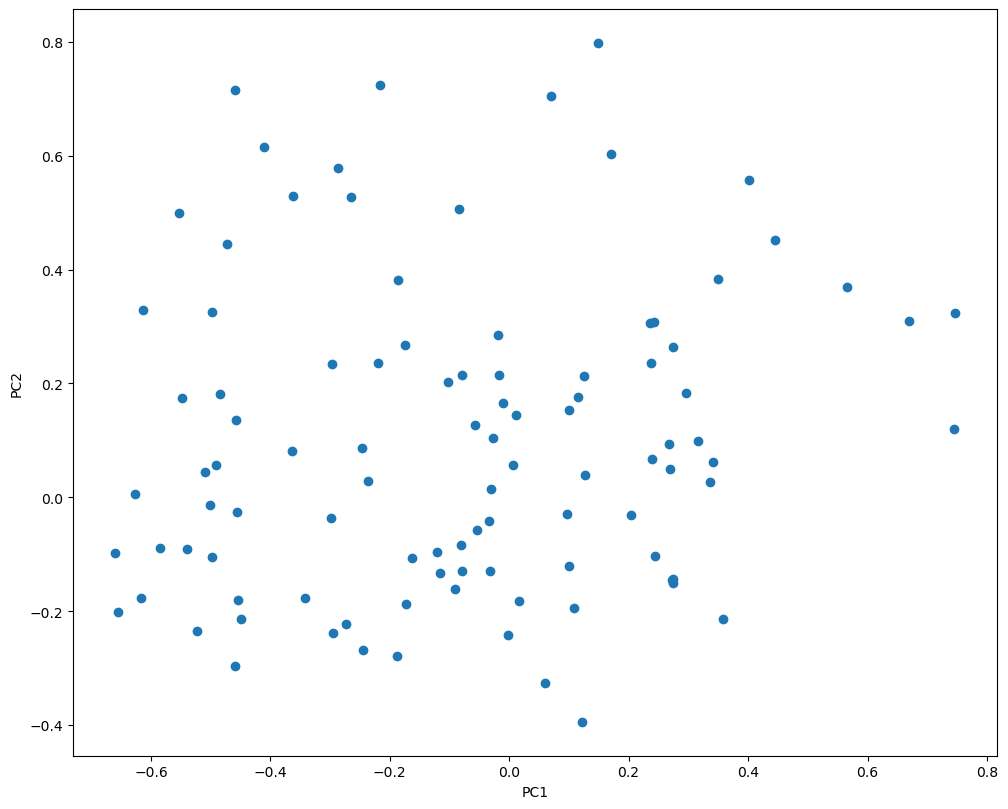

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(X[:100, 0], X[:100, 1])
plt.tight_layout()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [72]:
pca_1 = PCA(n_components=3)
X_1 = pca_1.fit_transform(model.wv.get_normed_vectors())
import plotly.express as px
fig = px.scatter_3d(X_1[:100], x = 0, y = 1, z = 2, color=model.wv.index_to_key[:100])
fig.show()
